In [2]:
%matplotlib inline
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
from scipy import stats as st
import scipy.stats as st
#Comprobar
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix
#Modificar
from sklearn.preprocessing import LabelEncoder
#Modelos Regresion
from sklearn.ensemble import RandomForestRegressor as RFR  
from sklearn.tree import ExtraTreeRegressor as ETR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from xgboost import XGBRegressor as XGBR
from catboost import CatBoostRegressor as CTR
from lightgbm import LGBMRegressor as LGBMR
from xgboost import XGBRFRegressor as XGBRF
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.linear_model import LogisticRegression as LogReg
#Modelos Clasificadores
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier
#Otros
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
#plt.rcParams['figure.figsize']=(20, 20)

# 0. Introducción

El objetivo de este proyecto final es generar un modelo capaz de predecir el resultado de un partido de fútbol y después aplicarlo en la predicción de la quiniela. En el DataFrame incluye partidos de primera y segunda divisón española. Estos datos vienen de la página https://football-data.co.uk/ . Hay registros desde la temporada 2022-2023 hasta la temporada 2005-2006. aparte de las variables que nos proporcionan la página web, generamos una variable que nos indique en que temporada han jugado.

![Quiniela](https://lotoluck.com/juegos/onlae/img/logo_quiniela_grande.png)

### Columnas:
- Id: Ideltificador del partido.
- Div: División del partido.
- Date: Día del partido.
- HomeTeam: Equipo Local.
- AwayTeam: Equipo Visitante.
- FTHG: Goles finales del Equipo Local.
- FTAG: Goles finales del Equipo Visitante.
- FTR: Resultado del partido(1x2).
- HTHG: Goles 1ª Parte del Equipo Local.
- HTAG: Goles 1ª Parte del Equipo Visitante.
- HTR: Resultado de la 1ª Parte(1x2).
- HS: Tiros del equipo Local.
- AS: Tiros del equipo Visitante.
- HST: Tiros a puerta del equipo Local.
- AST: Tiros a puerta del equipo Visitante.
- HF: Faltas del equipo Local.
- AF: Faltas del equipo Visitante.
- HC: Corners del equipo Local.
- AC: Corners del equipo Visitante.
- HY: Tarjetas Amarillas recibidas del equipo Local.
- AY: Tarjetas Amarillas recibidas del equipo Visitante.
- HR: Tarjetas Rojas recibidas del equipo Local.
- AR: Tarjetas Rojas recibidas del equipo Visitante.
- B365H: Cuota de casa de apuesta, Ganador Local.
- B365D: Cuota de casa de apuesta, Empate.
- B365A: Cuota de casa de apuesta, Ganador Visitante.
- Id_HomeTeam: Identificador del equipo Local.
- Id_AwayTeam: Identificador del equipo Visitante.

# 1. Cargar Datos

In [3]:
data = pd.read_csv('../final_match.csv')
data.head()

,Id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season,Id_HomeTeam,Id_AwayTeam,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWin3,HTWin5,HTLoss3,HTLoss5,ATWin3,ATWin5,ATLoss3,ATLoss5,HTDG,ATDG,DiffPts,DiffFormPts,Journey,Med_HTDG,Med_ATDG,Med_DiffPts,Med_DiffFormPts,Med_HTP,Med_ATP,FTR_h_or_not
0,0,SP2,2022-12-08,UD Ibiza,Racing Sant,1,0,H,0,0,D,6,7,4,4,22,13,3,6,1,4,0,1,2.7,3.10,2.75,2.55,2.9,2.75,2223,39,36,13,9,25,13,15,18,L,L,D,L,L,L,W,W,W,D,LDLWW,LLLWD,7,4,0,0,0,0,0,0,0,0,-12,-4,-3,3,19,-0.631579,-0.210526,-0.157895,0.157895,0.789474,0.947368,H
1,1,SP2,2022-12-08,Burgos,Eibar,1,2,A,1,0,H,7,17,3,5,4,12,2,7,4,2,0,0,3.1,3.00,2.50,3.00,2.8,2.45,2223,23,26,17,21,9,16,31,30,D,D,D,W,W,L,D,W,D,L,DDWDD,DWLWL,7,7,0,0,0,0,0,0,0,0,8,5,1,0,19,0.421053,0.263158,0.052632,0.000000,1.631579,1.578947,NH
2,2,SP2,2022-12-08,Malaga,Granada,1,1,D,1,0,H,11,16,4,8,15,13,5,4,4,2,0,0,3.1,3.25,2.37,3.00,3.0,2.30,2223,33,27,14,21,23,14,15,26,L,W,W,W,L,L,L,L,L,W,LWLLL,WWLLW,3,9,0,0,1,0,0,0,0,0,-9,7,-11,-6,19,-0.473684,0.368421,-0.578947,-0.315789,0.789474,1.368421,NH
3,3,SP2,2022-12-08,Levante,Ponferradina,0,0,D,0,0,D,19,3,7,0,6,12,7,6,4,2,0,0,1.5,4.20,7.00,1.44,4.1,6.75,2223,31,35,20,15,13,25,31,15,D,W,W,L,D,L,W,L,L,W,DWDWL,WLLLW,8,6,0,0,0,0,0,0,0,0,7,-10,16,2,19,0.368421,-0.526316,0.842105,0.105263,1.631579,0.789474,NH
4,4,SP2,2022-12-08,Lugo,Sporting Gijon,0,1,A,0,0,D,14,9,1,2,10,15,7,2,2,4,0,1,3.4,3.10,2.30,3.10,2.9,2.30,2223,32,37,16,21,23,20,18,25,D,W,W,D,W,W,L,L,L,L,DWWLL,WDWLL,7,7,0,0,0,0,0,0,0,0,-7,1,-7,0,19,-0.368421,0.052632,-0.368421,0.000000,0.947368,1.315789,NH


In [4]:
data.shape

(14663, 72)

## 1.1 Preparación de los datos

In [5]:
cat_cols = data.select_dtypes(include = ['object','category']).columns
num_cols = data.select_dtypes(exclude = ['object','category']).columns

cat_cols, num_cols

(Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTR', 'HTR', 'HM1', 'AM1',
        'HM2', 'AM2', 'HM3', 'AM3', 'HM4', 'AM4', 'HM5', 'AM5', 'HTFormPtsStr',
        'ATFormPtsStr', 'FTR_h_or_not'],
       dtype='object'),
 Index(['Id', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF',
        'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A',
        'BWH', 'BWD', 'BWA', 'Season', 'Id_HomeTeam', 'Id_AwayTeam', 'HTGS',
        'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HTFormPts', 'ATFormPts',
        'HTWin3', 'HTWin5', 'HTLoss3', 'HTLoss5', 'ATWin3', 'ATWin5', 'ATLoss3',
        'ATLoss5', 'HTDG', 'ATDG', 'DiffPts', 'DiffFormPts', 'Journey',
        'Med_HTDG', 'Med_ATDG', 'Med_DiffPts', 'Med_DiffFormPts', 'Med_HTP',
        'Med_ATP'],
       dtype='object'))

In [6]:
data.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14663 entries, 0 to 14662
Data columns (total 72 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               14663 non-null  int64  
 1   Div              14663 non-null  object 
 2   Date             14663 non-null  object 
 3   HomeTeam         14663 non-null  object 
 4   AwayTeam         14663 non-null  object 
 5   FTHG             14663 non-null  int64  
 6   FTAG             14663 non-null  int64  
 7   FTR              14663 non-null  object 
 8   HTHG             14663 non-null  int64  
 9   HTAG             14663 non-null  int64  
 10  HTR              14663 non-null  object 
 11  HS               14663 non-null  int64  
 12  AS               14663 non-null  int64  
 13  HST              14663 non-null  int64  
 14  AST              14663 non-null  int64  
 15  HF               14663 non-null  int64  
 16  AF               14663 non-null  int64  
 17  HC          

# 2. Analisis de los Datos

## 2.1 Variable a Predecir

H    6745
D    4016
A    3902
Name: FTR, dtype: int64

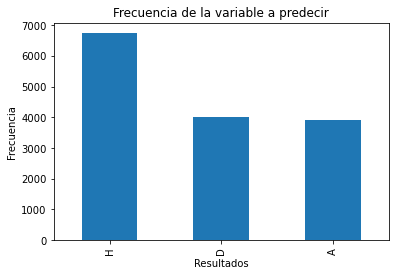

In [7]:
data['FTR'].value_counts().plot(kind='bar')
plt.title('Frecuencia de la variable a predecir')
plt.ylabel('Frecuencia')
plt.xlabel('Resultados')
data['FTR'].value_counts()

Desbalanceo hacia la victoria Local

## 2.2 Variables numericas

In [8]:
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,14663.0,7331.000000,4232.987834,0.00,3665.500000,7331.000000,10996.500000,14662.000000
FTHG,14663.0,1.448680,1.232686,0.00,1.000000,1.000000,2.000000,10.000000
FTAG,14663.0,1.055650,1.063224,0.00,0.000000,1.000000,2.000000,8.000000
HTHG,14663.0,0.638751,0.798284,0.00,0.000000,0.000000,1.000000,6.000000
HTAG,14663.0,0.449703,0.674610,0.00,0.000000,0.000000,1.000000,5.000000
HS,14663.0,13.169474,3.856269,1.00,12.000000,13.000000,14.000000,42.000000
AS,14663.0,10.769829,3.409370,0.00,9.000000,11.000000,11.000000,39.000000
HST,14663.0,4.811567,1.992900,0.00,4.000000,5.000000,5.000000,20.000000
AST,14663.0,3.798813,1.709508,0.00,3.000000,4.000000,4.000000,16.000000
HF,14663.0,14.954443,3.643951,0.00,14.000000,15.000000,16.000000,37.000000


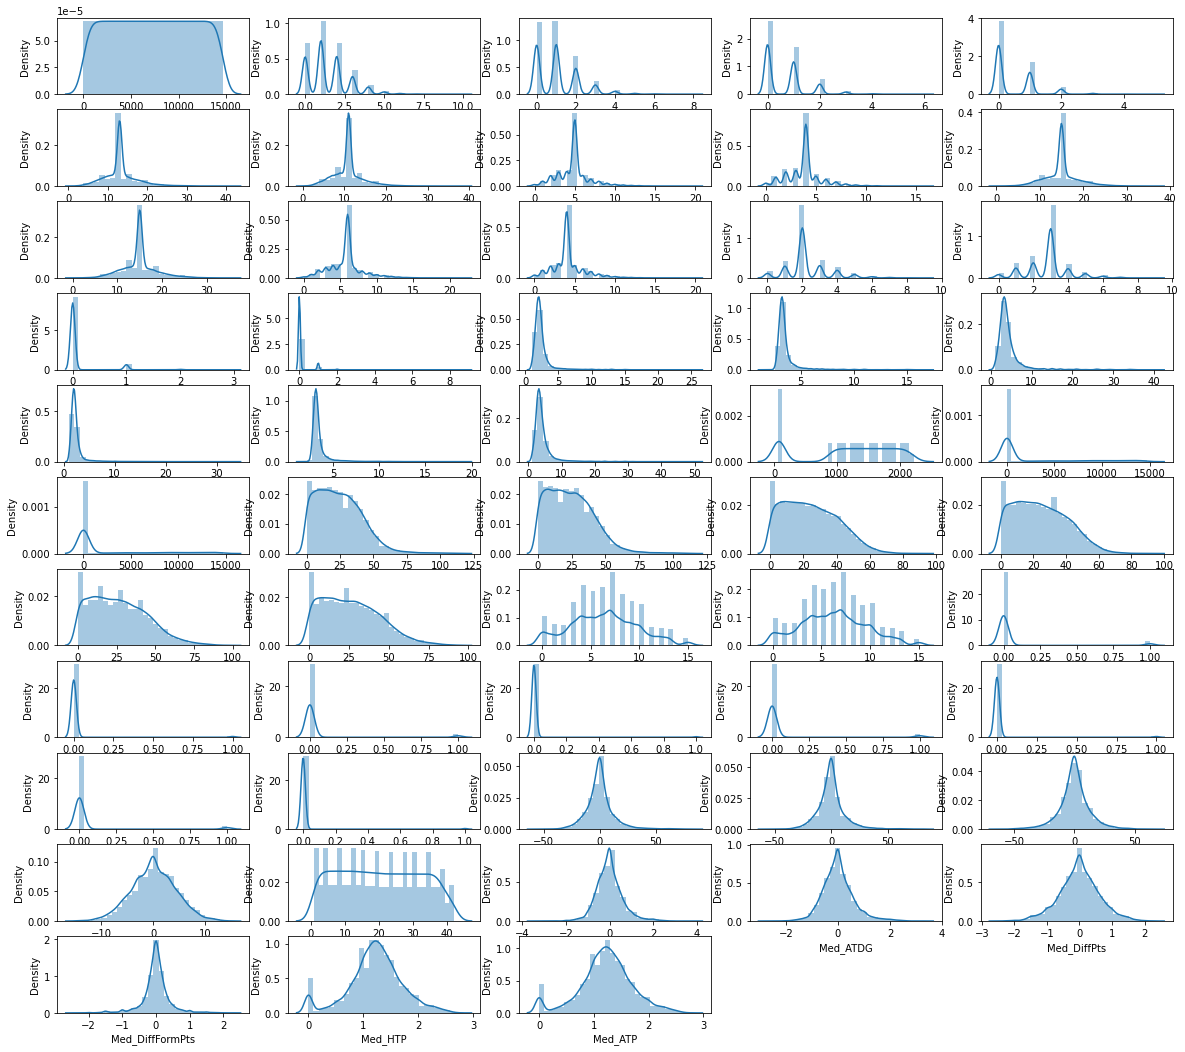

In [9]:
plt.figure(figsize=(20,20))
n = 0
for i,e in enumerate(num_cols):
    n += 1
    plt.subplot(12, 5, n)
    sns.distplot(data[e], bins = 30)
    #if i%5==0:
        #plt.gca().axes.xaxis.set_ticklabels([])
    #else:
        #plt.ylabel('')
        
plt.show();

## 2.3 Coorelación entre variables

In [10]:
def correlacion(df):
    plt.figure(figsize=(70,70))
    df = df.copy()
    for x in df.select_dtypes(include = ['object','category']):
        df[x] = LabelEncoder().fit_transform(df[x]) #categoricas a número
        
    sns.set(style='white')    # estilo blanco
    mascara=np.triu(np.ones_like(df.corr(method='pearson'), dtype=bool))   # genera una mascara
    cmap=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores
    sns.heatmap(df.corr(method='pearson'),
                mask=mascara,
                cmap=cmap,
                vmax=1,
                vmin=-1,
                center=0,
                square=True,
                linewidth=0.5,
                cbar_kws={'shrink': 0.5},
                annot=True
               );

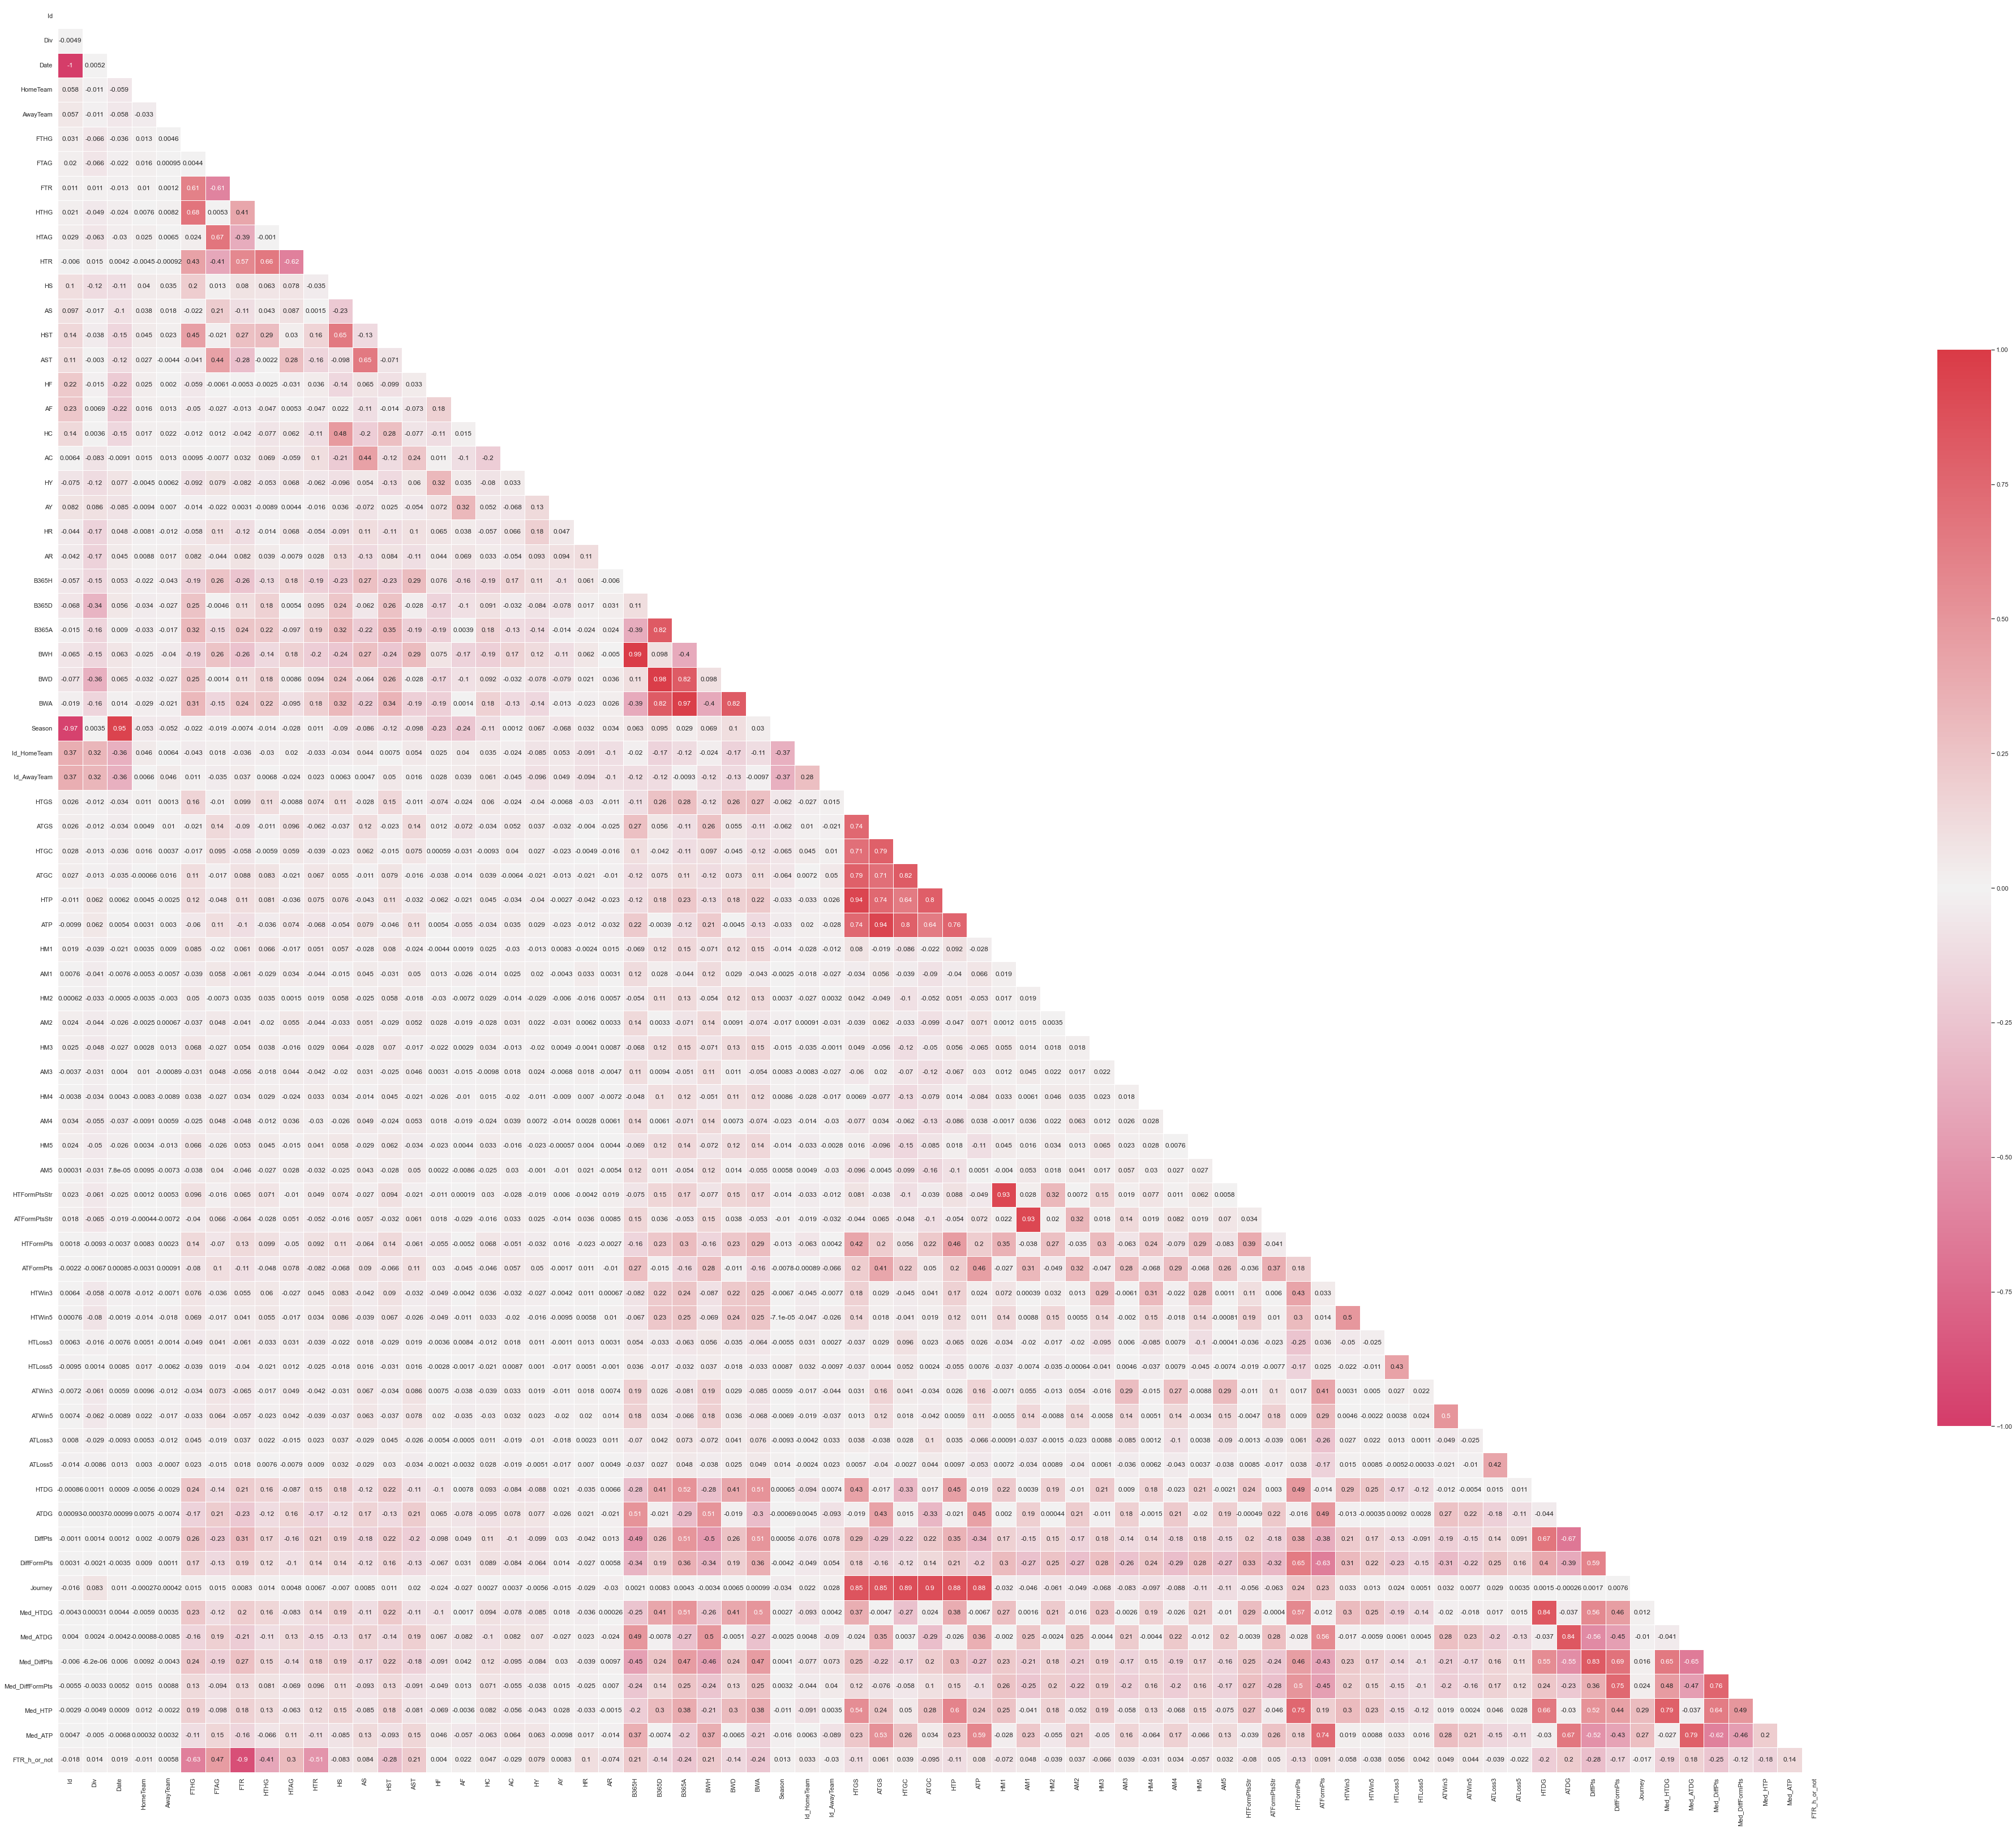

In [11]:
correlacion(data)

# 3. Modificación de variables

## 3.1 Variable Date

In [12]:
day = []
month = []
year = []
for x in data.Date:
    x = x.split('-')
    day.append(int(x[2]))
    month.append(int(x[1]))
    year.append(int(x[0]))
data['year'] = year
data['month'] = month
data['day'] = day

data = data.drop(['Date'], axis = 1)
data.head()

,Id,Div,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season,Id_HomeTeam,Id_AwayTeam,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWin3,HTWin5,HTLoss3,HTLoss5,ATWin3,ATWin5,ATLoss3,ATLoss5,HTDG,ATDG,DiffPts,DiffFormPts,Journey,Med_HTDG,Med_ATDG,Med_DiffPts,Med_DiffFormPts,Med_HTP,Med_ATP,FTR_h_or_not,year,month,day
0,0,SP2,UD Ibiza,Racing Sant,1,0,H,0,0,D,6,7,4,4,22,13,3,6,1,4,0,1,2.7,3.10,2.75,2.55,2.9,2.75,2223,39,36,13,9,25,13,15,18,L,L,D,L,L,L,W,W,W,D,LDLWW,LLLWD,7,4,0,0,0,0,0,0,0,0,-12,-4,-3,3,19,-0.631579,-0.210526,-0.157895,0.157895,0.789474,0.947368,H,2022,12,8
1,1,SP2,Burgos,Eibar,1,2,A,1,0,H,7,17,3,5,4,12,2,7,4,2,0,0,3.1,3.00,2.50,3.00,2.8,2.45,2223,23,26,17,21,9,16,31,30,D,D,D,W,W,L,D,W,D,L,DDWDD,DWLWL,7,7,0,0,0,0,0,0,0,0,8,5,1,0,19,0.421053,0.263158,0.052632,0.000000,1.631579,1.578947,NH,2022,12,8
2,2,SP2,Malaga,Granada,1,1,D,1,0,H,11,16,4,8,15,13,5,4,4,2,0,0,3.1,3.25,2.37,3.00,3.0,2.30,2223,33,27,14,21,23,14,15,26,L,W,W,W,L,L,L,L,L,W,LWLLL,WWLLW,3,9,0,0,1,0,0,0,0,0,-9,7,-11,-6,19,-0.473684,0.368421,-0.578947,-0.315789,0.789474,1.368421,NH,2022,12,8
3,3,SP2,Levante,Ponferradina,0,0,D,0,0,D,19,3,7,0,6,12,7,6,4,2,0,0,1.5,4.20,7.00,1.44,4.1,6.75,2223,31,35,20,15,13,25,31,15,D,W,W,L,D,L,W,L,L,W,DWDWL,WLLLW,8,6,0,0,0,0,0,0,0,0,7,-10,16,2,19,0.368421,-0.526316,0.842105,0.105263,1.631579,0.789474,NH,2022,12,8
4,4,SP2,Lugo,Sporting Gijon,0,1,A,0,0,D,14,9,1,2,10,15,7,2,2,4,0,1,3.4,3.10,2.30,3.10,2.9,2.30,2223,32,37,16,21,23,20,18,25,D,W,W,D,W,W,L,L,L,L,DWWLL,WDWLL,7,7,0,0,0,0,0,0,0,0,-7,1,-7,0,19,-0.368421,0.052632,-0.368421,0.000000,0.947368,1.315789,NH,2022,12,8


## 3.2 Transformación de variables categóricas

In [13]:
def diction(col):
    lista = list(data[col].unique())
    nums =[i for i in range(len(lista))]
    print({(lista[i]): (nums[i]) for i in range(len(lista))})
    return {(lista[i]): (nums[i]) for i in range(len(lista))}
data.select_dtypes(include = ['object','category'])

,Div,HomeTeam,AwayTeam,FTR,HTR,HM1,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5,HTFormPtsStr,ATFormPtsStr,FTR_h_or_not
0,SP2,UD Ibiza,Racing Sant,H,D,L,L,D,L,L,L,W,W,W,D,LDLWW,LLLWD,H
1,SP2,Burgos,Eibar,A,H,D,D,D,W,W,L,D,W,D,L,DDWDD,DWLWL,NH
2,SP2,Malaga,Granada,D,H,L,W,W,W,L,L,L,L,L,W,LWLLL,WWLLW,NH
3,SP2,Levante,Ponferradina,D,D,D,W,W,L,D,L,W,L,L,W,DWDWL,WLLLW,NH
4,SP2,Lugo,Sporting Gijon,A,D,D,W,W,D,W,W,L,L,L,L,DWWLL,WDWLL,NH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14658,SP1,Cadiz,Real Madrid,A,A,M,M,M,M,M,M,M,M,M,M,MMMMM,MMMMM,NH
14659,SP1,Atletico Madrid,Zaragoza,D,D,M,M,M,M,M,M,M,M,M,M,MMMMM,MMMMM,NH
14660,SP1,Alaves,Barcelona,D,D,M,M,M,M,M,M,M,M,M,M,MMMMM,MMMMM,NH
14661,SP1,Valencia,Betis,H,D,M,M,M,M,M,M,M,M,M,M,MMMMM,MMMMM,H


In [14]:
data.AM5.unique()

array(['D', 'L', 'W', 'M'], dtype=object)

In [15]:
data.FTR.unique()

array(['H', 'A', 'D'], dtype=object)

In [16]:
form_dict ={
    'D': 0,
    'L': 1,
    'W': 2,
    'M': 3
}
res_dict ={
    'D': 0,
    'A': 1,
    'H': 2
}

In [17]:
data['HTFormPtsStr'].unique()

array(['LDLWW', 'DDWDD', 'LWLLL', 'DWDWL', 'DWWLL', 'DLWLW', 'WWLWW',
       'LLWWL', 'WWDDL', 'LLWLD', 'LLLWD', 'WDWLD', 'WLWLW', 'LLWDL',
       'LWDWD', 'LLDLW', 'LWLWD', 'DWLLW', 'WLLWL', 'LWWLW', 'LWWDW',
       'WLLDL', 'WLDLL', 'WDDDD', 'DWDWD', 'DDLDL', 'WLLDW', 'LLLDD',
       'DWWDW', 'WWLWD', 'DLWDD', 'WLWDD', 'LWDDL', 'WDLDW', 'LLWDW',
       'LWDLD', 'LWDDD', 'WWLDD', 'LWLDD', 'LDLDL', 'DWDDW', 'LDDDL',
       'WLWDL', 'LDWDD', 'DLLWW', 'LWDDW', 'DDDWW', 'WDWDL', 'LDDWL',
       'WDWLW', 'DWLDW', 'WDDWL', 'WDDLL', 'LWDLL', 'LDWWD', 'WDDWW',
       'LDDLW', 'DLDDL', 'LLWWW', 'WDDWD', 'WLDWL', 'DDLWL', 'LDLLW',
       'WDLLL', 'WLDWD', 'DWWWL', 'DDDWL', 'DLLWL', 'WWDDD', 'DLLWD',
       'DLLLL', 'LDWDW', 'LDLWD', 'DLLDD', 'DWLWD', 'DWLLL', 'WWWWD',
       'LLLWW', 'LWLWL', 'DLDLW', 'DWDDD', 'LDDWD', 'LLLLD', 'LWLLW',
       'LWDWL', 'LWDWW', 'WDWDW', 'WLLLW', 'DDDDW', 'DWWDD', 'DDDLL',
       'WWDWD', 'LWLLD', 'LDWDL', 'DLWLD', 'DWLWL', 'WLLDD', 'DLDDD',
       'LLDLL', 'DDW

data_endode = data.copy()

for x in data.select_dtypes(include = ['object','category']):
    data_endode[x] = LabelEncoder().fit_transform(data[x]) #categoricas a número
data_endode.head()

In [21]:
data_endode = data.copy()
#Creación de diccionarios
dictio_div = diction('Div')
dictio_hometeam = diction('HomeTeam')
dictio_HTFormPtsStr = diction('HTFormPtsStr')
dictio_ATFormPtsStr = diction('ATFormPtsStr')
dictio_HTFormPtsStr.update(dictio_ATFormPtsStr)
dictio_FTR_h_or_not = diction('FTR_h_or_not')
# Transformación
data_endode.Div = data_endode.Div.apply(lambda x: dictio_div[x])
data_endode.HomeTeam = data_endode.HomeTeam.apply(lambda x: dictio_hometeam[x])
data_endode.AwayTeam = data_endode.AwayTeam.apply(lambda x: dictio_hometeam[x])
data_endode[['FTR','HTR']] = data_endode[['FTR','HTR']].replace(res_dict)
data_endode.HTFormPtsStr = data_endode.HTFormPtsStr.apply(lambda x: dictio_HTFormPtsStr[x])
data_endode.ATFormPtsStr = data_endode.ATFormPtsStr.apply(lambda x: dictio_HTFormPtsStr[x])
data_endode.FTR_h_or_not = data_endode.FTR_h_or_not.apply(lambda x: dictio_FTR_h_or_not[x])
data_endode[['HM1','AM1','HM2','AM2','HM3','AM3','HM4','AM4','HM5','AM5']] = data_endode[['HM1','AM1','HM2','AM2','HM3','AM3','HM4','AM4','HM5','AM5']].replace(form_dict)
data_endode.head()

{'SP2': 0, 'SP1': 1}
{'UD Ibiza': 0, 'Burgos': 1, 'Malaga': 2, 'Levante': 3, 'Lugo': 4, 'Tenerife': 5, 'Cartagena': 6, 'Huesca': 7, 'Albacete': 8, 'Oviedo': 9, 'Leganes': 10, 'Ponferradina': 11, 'Eibar': 12, 'Racing Sant': 13, 'Andorra': 14, 'CD Mirandes': 15, 'Zaragoza': 16, 'Villarreal B': 17, 'Sporting Gijon': 18, 'Granada': 19, 'Las Palmas': 20, 'Alaves': 21, 'Valladolid': 22, 'Alcorcon': 23, 'Amorebieta': 24, 'Real Sociedad B': 25, 'Almeria': 26, 'Girona': 27, 'Fuenlabrada': 28, 'Logrones': 29, 'Rayo Vallecano': 30, 'Castellon': 31, 'Sabadell': 32, 'Espanyol': 33, 'Mallorca': 34, 'La Coruna': 35, 'Elche': 36, 'Cadiz': 37, 'Numancia': 38, 'Extremadura UD': 39, 'Gimnastic': 40, 'Rayo Majadahonda': 41, 'Osasuna': 42, 'Reus Deportiu': 43, 'Cordoba': 44, 'Barcelona B': 45, 'Lorca': 46, 'Leonesa': 47, 'Sevilla B': 48, 'Getafe': 49, 'UCAM Murcia': 50, 'Athletic Club B': 51, 'Llagostera': 52, 'Betis': 53, 'Recreativo': 54, 'Hercules': 55, 'Jaen': 56, 'Murcia': 57, 'Real Madrid B': 58, 'Xe

,Id,Div,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season,Id_HomeTeam,Id_AwayTeam,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWin3,HTWin5,HTLoss3,HTLoss5,ATWin3,ATWin5,ATLoss3,ATLoss5,HTDG,ATDG,DiffPts,DiffFormPts,Journey,Med_HTDG,Med_ATDG,Med_DiffPts,Med_DiffFormPts,Med_HTP,Med_ATP,FTR_h_or_not,year,month,day
0,0,0,0,13,1,0,2,0,0,0,6,7,4,4,22,13,3,6,1,4,0,1,2.7,3.10,2.75,2.55,2.9,2.75,2223,39,36,13,9,25,13,15,18,1,1,0,1,1,1,2,2,2,0,146,0,7,4,0,0,0,0,0,0,0,0,-12,-4,-3,3,19,-0.631579,-0.210526,-0.157895,0.157895,0.789474,0.947368,0,2022,12,8
1,1,0,1,12,1,2,1,1,0,2,7,17,3,5,4,12,2,7,4,2,0,0,3.1,3.00,2.50,3.00,2.8,2.45,2223,23,26,17,21,9,16,31,30,0,0,0,2,2,1,0,2,0,1,68,1,7,7,0,0,0,0,0,0,0,0,8,5,1,0,19,0.421053,0.263158,0.052632,0.000000,1.631579,1.578947,1,2022,12,8
2,2,0,2,19,1,1,0,1,0,2,11,16,4,8,15,13,5,4,4,2,0,0,3.1,3.25,2.37,3.00,3.0,2.30,2223,33,27,14,21,23,14,15,26,1,2,2,2,1,1,1,1,1,2,185,2,3,9,0,0,1,0,0,0,0,0,-9,7,-11,-6,19,-0.473684,0.368421,-0.578947,-0.315789,0.789474,1.368421,1,2022,12,8
3,3,0,3,11,0,0,0,0,0,0,19,3,7,0,6,12,7,6,4,2,0,0,1.5,4.20,7.00,1.44,4.1,6.75,2223,31,35,20,15,13,25,31,15,0,2,2,1,0,1,2,1,1,2,101,3,8,6,0,0,0,0,0,0,0,0,7,-10,16,2,19,0.368421,-0.526316,0.842105,0.105263,1.631579,0.789474,1,2022,12,8
4,4,0,4,18,0,1,1,0,0,0,14,9,1,2,10,15,7,2,2,4,0,1,3.4,3.10,2.30,3.10,2.9,2.30,2223,32,37,16,21,23,20,18,25,0,2,2,0,2,2,1,1,1,1,148,4,7,7,0,0,0,0,0,0,0,0,-7,1,-7,0,19,-0.368421,0.052632,-0.368421,0.000000,0.947368,1.315789,1,2022,12,8


# 4. Modelos

Vamos a crear una partición de los datos entre train y test. Después probaremos diferentes modelos para ver cual es el mejor y mejoraremos el modelo escogido.

## 4.1 Partición

In [22]:
def mean_n(df):
    return df.apply(lambda x: (x-x.mean())/ x.std(), axis = 0)


In [24]:
X = data_endode.drop(['FTR', 'FTHG','FTAG','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','Id_HomeTeam', 'Id_AwayTeam','FTR_h_or_not'], axis = 1)
y = data_endode.FTR
#print(data_endode.FTR)
X = mean_n(X)
#print(X)
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=0, stratify = y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11730, 53), (2933, 53), (11730,), (2933,))

## 4.2 Comparación de modelos

In [25]:
models = {
    'XGBC': XGBClassifier(random_state=1234),
    'RFC': RandomForestClassifier(random_state=1234),
    'CatBoostC': CatBoostClassifier(random_state=1234, verbose=0),
    'BaggingC': BaggingClassifier(random_state=1234, verbose=0)
}
def compar(mod, X_train, y_train):
    resultados = []
    names = []
    for k, v in mod.items():
        r = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234)
        scores = cvs(v, X_train, y_train, scoring = 'accuracy', cv = r, n_jobs = 1)
        resultados.append(scores)
        names.append(k)
        #print(scores)
        print(k)
        print('Accuracy: ' + str(np.mean(scores)) + ', std: ' + str(np.std(scores)))
    return (resultados, names)
result, name = compar(models, X_train, y_train)

XGBC
Accuracy: 0.5015629440181869, std: 0.012425159196241535
RFC
Accuracy: 0.5046319977266269, std: 0.013943998609595913
CatBoostC
Accuracy: 0.506280193236715, std: 0.014552362800186146
BaggingC
Accuracy: 0.4533390167661267, std: 0.0167719295808604


Los modelos que mejor resultado obtienen son *CatBoostC* y *RandomForestClassifier*. Vamos a quedarnos con *CatBoostC* que es el que mejor precision representa.

## 4.3 Modelo CatBoostC (Mejor Modelo)

In [26]:
rskf = StratifiedKFold(n_splits=10, shuffle = True, random_state=1234)

In [27]:
#CatBoostC
parametro = {
    'max_depth': [4,5],
    'iterations': [900,1000,1100],
    'learning_rate': [0.02, 0.04, 0.05],
}

cat = CatBoostClassifier(random_state = 42, silent = True, thread_count = 1)

gsc = RandomizedSearchCV(estimator = cat, param_distributions = parametro, cv = rskf, n_iter = 25, 
                         verbose = 2, scoring = 'accuracy', n_jobs = 1)
gsc.fit(X_train, y_train)


Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV] END ....iterations=900, learning_rate=0.02, max_depth=4; total time=  17.9s
[CV] END ....iterations=900, learning_rate=0.02, max_depth=4; total time=  20.3s
[CV] END ....iterations=900, learning_rate=0.02, max_depth=4; total time=  19.2s
[CV] END ....iterations=900, learning_rate=0.02, max_depth=4; total time=  18.5s
[CV] END ....iterations=900, learning_rate=0.02, max_depth=4; total time=  17.9s
[CV] END ....iterations=900, learning_rate=0.02, max_depth=4; total time=  19.3s
[CV] END ....iterations=900, learning_rate=0.02, max_depth=4; total time=  19.2s
[CV] END ....iterations=900, learning_rate=0.02, max_depth=4; total time=  18.5s
[CV] END ....iterations=900, learning_rate=0.02, max_depth=4; total time=  18.2s
[CV] END ....iterations=900, learning_rate=0.02, max_depth=4; total time=  18.6s
[CV] END ....iterations=900, learning_rate=0.02, max_depth=5; total time=  25.7s
[CV] END ....iterations=900, learning_rate=0.0

[CV] END ...iterations=1000, learning_rate=0.05, max_depth=4; total time=  20.2s
[CV] END ...iterations=1000, learning_rate=0.05, max_depth=4; total time=  19.9s
[CV] END ...iterations=1000, learning_rate=0.05, max_depth=4; total time=  20.2s
[CV] END ...iterations=1000, learning_rate=0.05, max_depth=4; total time=  20.1s
[CV] END ...iterations=1000, learning_rate=0.05, max_depth=4; total time=  18.9s
[CV] END ...iterations=1000, learning_rate=0.05, max_depth=4; total time=  19.8s
[CV] END ...iterations=1000, learning_rate=0.05, max_depth=4; total time=  19.6s
[CV] END ...iterations=1000, learning_rate=0.05, max_depth=4; total time=  20.3s
[CV] END ...iterations=1000, learning_rate=0.05, max_depth=4; total time=  19.6s
[CV] END ...iterations=1000, learning_rate=0.05, max_depth=5; total time=  26.2s
[CV] END ...iterations=1000, learning_rate=0.05, max_depth=5; total time=  27.9s
[CV] END ...iterations=1000, learning_rate=0.05, max_depth=5; total time=  26.7s
[CV] END ...iterations=1000,

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1234, shuffle=True),
                   estimator=<catboost.core.CatBoostClassifier object at 0x000002EFB9AC98E0>,
                   n_iter=25, n_jobs=1,
                   param_distributions={'iterations': [900, 1000, 1100],
                                        'learning_rate': [0.02, 0.04, 0.05],
                                        'max_depth': [4, 5]},
                   scoring='accuracy', verbose=2)

In [28]:
print('Mejor score: ' + str(gsc.best_score_))

cat = gsc.best_estimator_.fit(X_train, y_train)

print(accuracy_score(y_train, cat.predict(X_train)))

print(accuracy_score(y_test, cat.predict(X_test)))

Mejor score: 0.5245524296675192
0.5933503836317136
0.5073303784520968


In [29]:
cat.get_params()

{'iterations': 1000,
 'learning_rate': 0.04,
 'thread_count': 1,
 'silent': True,
 'max_depth': 4,
 'random_state': 42}

## 4.4 Selección de Variables

In [30]:
model = CatBoostClassifier(random_state = 42, silent = True, thread_count = 1, iterations = 1000, learning_rate = 0.04, 
                           max_depth = 4)
selector = RFECV(model, step = 1, min_features_to_select = 3, cv = 3)
selector.fit(X_train, y_train)

RFECV(cv=3,
      estimator=<catboost.core.CatBoostClassifier object at 0x000002EFB76CA400>,
      min_features_to_select=3)

In [31]:
selector.n_features_

41

In [32]:
X.columns[selector.get_support()]

Index(['Id', 'HomeTeam', 'AwayTeam', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'Season', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1',
       'AM1', 'HM2', 'AM2', 'HM3', 'AM3', 'HM5', 'AM5', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTDG', 'ATDG', 'DiffPts',
       'DiffFormPts', 'Journey', 'Med_HTDG', 'Med_ATDG', 'Med_DiffPts',
       'Med_DiffFormPts', 'Med_HTP', 'Med_ATP', 'month', 'day'],
      dtype='object')

Text(0, 0.5, 'Accuracy')

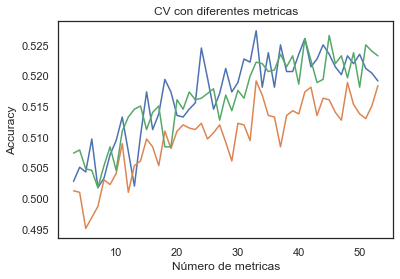

In [33]:
plt.plot(range(3, len(selector.grid_scores_) + 3), selector.grid_scores_)
plt.title('CV con diferentes metricas')
plt.xlabel('Número de metricas')
plt.ylabel('Accuracy')

## 4.5 The Best

In [34]:
X = X[['Id', 'HomeTeam', 'AwayTeam', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'Season', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1',
       'AM1', 'HM2', 'AM2', 'HM3', 'AM3', 'HM5', 'AM5', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTDG', 'ATDG', 'DiffPts',
       'DiffFormPts', 'Journey', 'Med_HTDG', 'Med_ATDG', 'Med_DiffPts',
       'Med_DiffFormPts', 'Med_HTP', 'Med_ATP', 'month', 'day']]
y = data_endode.FTR

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=0, stratify = y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11730, 41), (2933, 41), (11730,), (2933,))

In [49]:
model_fin = CatBoostClassifier(random_state = 42, silent = True, thread_count = 1, iterations = 1000, learning_rate = 0.04, 
                           max_depth = 4).fit(X_train, y_train)

y_pred = model_fin.predict(X_test)
y_pred[:10]

array([[2],
       [1],
       [2],
       [2],
       [1],
       [2],
       [0],
       [2],
       [2],
       [2]], dtype=int64)

In [50]:
accuracy_score(y_pred, y_test)

0.5183374083129584

In [51]:
matriz = confusion_matrix(y_pred, y_test)
matriz

array([[ 105,   82,  104],
       [ 136,  279,  114],
       [ 542,  401, 1100]], dtype=int64)

In [52]:
matriz[0][0]/sum(matriz[0]), matriz[1][1]/sum(matriz[1]), matriz[2][2]/sum(matriz[2])

(0.36082474226804123, 0.5274102079395085, 0.5384238864415076)

## 4.6 Importancia de variables en el último modelo

In [53]:
imp = {}
for x in range(len(X_train.columns)):
    imp[X_train.columns[x]] = model_fin.feature_importances_[x]

pd.DataFrame.from_dict(imp, orient = 'index', columns=['Importancia']).sort_values('Importancia', ascending = False).head()

,Importancia
DiffPts,5.052117
Med_DiffPts,4.898010
B365H,4.299607
BWA,4.172273
month,4.072902


In [119]:
X_nuev0 = data_endode[data_endode.Season == 2223].drop(['FTR', 'FTHG','FTAG','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','Id_HomeTeam', 'Id_AwayTeam'], axis = 1)

X_nuev0 = mean_n(X_nuev0)
X_nuev0.head()

,Id,Div,HomeTeam,AwayTeam,B365H,B365D,B365A,BWH,BWD,BWA,Season,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWin3,HTWin5,HTLoss3,HTLoss5,ATWin3,ATWin5,ATLoss3,ATLoss5,HTDG,ATDG,DiffPts,DiffFormPts,Journey,Med_HTDG,Med_ATDG,Med_DiffPts,Med_DiffFormPts,Med_HTP,Med_ATP,FTR_h_or_not,year,month,day
0,-1.724377,-0.83963,-1.113937,-0.636510,0.228468,-0.595580,-0.497599,0.203346,-0.561976,-0.443969,NaN,1.144544,1.368703,2.835404,-0.202300,0.469584,2.685829,0.932852,-1.456402,-0.350147,-1.297511,-0.417720,0.571189,-0.468368,-1.421712,0.283038,-1.393273,-0.867432,-1.332141,0.129764,0.455800,-0.183138,-0.109273,-0.134234,-0.054393,-0.155469,-0.077037,-0.174349,-0.054393,-2.116278,1.878013,-2.815508,-0.288353,1.922719,-1.099600,0.974029,-1.352380,-0.087634,-0.512739,1.149957,-0.897272,NaN,2.17396,-1.119968
1,-1.714144,-0.83963,-1.073682,-0.272756,-0.627273,-0.367755,0.578826,-0.614773,-0.131913,0.282423,NaN,1.822347,1.195501,1.155533,0.956638,2.165023,1.645061,-1.219394,-0.303559,0.697196,-0.300787,-0.417720,0.571189,0.446709,0.401964,-0.602766,-0.519569,-0.775164,-1.319205,0.426116,0.161230,-0.183138,-0.109273,-0.134234,-0.054393,-0.155469,-0.077037,-0.174349,-0.054393,0.810147,0.231402,0.653417,0.231452,1.922719,0.414009,0.124338,0.336263,0.103905,0.758559,0.355176,1.111192,NaN,2.17396,-1.232900
2,-1.703910,-0.83963,-1.033426,-0.515259,-0.242190,-0.481667,-0.164886,-0.285747,-0.454460,-0.164587,NaN,1.822347,2.234711,0.987545,0.956638,1.773768,2.685829,-0.143271,0.849284,-0.350147,0.695937,0.529860,-0.394120,-1.383445,0.401964,0.283038,0.354134,-1.467172,-1.306269,0.426116,1.928655,-0.183138,-0.109273,-0.134234,-0.054393,-0.155469,-0.077037,-0.174349,-0.054393,1.019178,1.466360,-1.163639,-1.327963,1.922719,0.522124,0.761606,-0.548264,-0.470713,0.465182,1.149957,-0.897272,NaN,2.17396,-1.232900
3,-1.693676,-0.83963,-0.993171,-0.353590,-0.747077,0.258763,0.676682,-0.748161,0.190634,0.617681,NaN,1.991798,0.849098,0.819558,2.281138,2.556278,0.474196,-1.219394,-0.303559,0.697196,0.695937,-1.365301,-0.394120,0.446709,-0.509874,-0.602766,-0.519569,0.078311,-1.293333,0.722468,-0.722483,-0.183138,-0.109273,-0.134234,-0.054393,-0.155469,-0.077037,5.718650,-0.054393,1.437239,-1.826861,2.635660,1.271061,1.922719,0.738354,-0.937777,1.301201,0.486984,1.051935,-0.538953,1.111192,NaN,2.17396,-1.232900
4,-1.683443,-0.83963,-0.952915,-0.555676,-0.627273,-0.139930,0.383112,-0.623665,-0.024398,0.245172,NaN,0.127840,1.368703,0.651571,2.281138,0.991257,0.994580,-0.143271,-1.456402,-0.350147,0.695937,-0.417720,0.571189,0.446709,-0.509874,-1.488571,-0.519569,-1.628640,-1.280397,-0.462941,0.455800,-0.183138,-0.109273,-0.134234,-0.054393,-0.155469,-0.077037,-0.174349,-0.054393,-0.653065,-1.209382,-0.007331,-0.808158,1.922719,-0.342796,-0.619143,0.014616,-0.279174,-0.121571,-0.141563,-0.897272,NaN,2.17396,-1.232900


In [120]:
#Vamos a extraer los testeos para la temporada 22/23
data_endode[data_endode.Season == 2223].to_csv('../testeo.csv',index=False)
X_nuev0.to_csv('../testeo_mean.csv',index=False)

In [85]:
data_train = data_endode[data_endode.Season != 2223].drop(['FTHG','FTAG','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','Id_HomeTeam', 'Id_AwayTeam'], axis = 1)

data_test = data_endode[data_endode.Season == 2223].drop(['FTR', 'FTHG','FTAG','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','Id_HomeTeam', 'Id_AwayTeam'], axis = 1)

In [86]:
data_res = data_endode[data_endode.Season == 2223].drop(['FTHG','FTAG','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','Id_HomeTeam', 'Id_AwayTeam'], axis = 1)

In [87]:
data_train.head()

,Id,Div,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,BWH,BWD,BWA,Season,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWin3,HTWin5,HTLoss3,HTLoss5,ATWin3,ATWin5,ATLoss3,ATLoss5,HTDG,ATDG,DiffPts,DiffFormPts,Journey,Med_HTDG,Med_ATDG,Med_DiffPts,Med_DiffFormPts,Med_HTP,Med_ATP,FTR_h_or_not,year,month,day
209,349,0,22,7,2,1.36,5.50,7.00,1.34,4.75,7.25,2122,70,47,42,44,80,51,2,2,2,1,1,1,1,1,1,0,228,12,6,4,0,0,1,0,0,0,0,0,28,3,29,2,42,0.666667,0.071429,0.690476,0.047619,1.904762,1.214286,0,2022,5,29
210,350,0,5,6,1,1.55,4.00,6.50,1.49,4.00,5.50,2122,51,62,36,54,66,60,0,1,0,2,2,2,2,1,1,2,287,13,8,9,0,0,0,0,0,0,0,0,15,8,6,-1,42,0.357143,0.190476,0.142857,-0.023810,1.571429,1.428571,1,2022,5,29
211,351,0,18,20,1,6.00,3.60,1.65,5.00,3.40,1.65,2122,42,56,48,46,43,69,0,0,2,2,2,1,2,0,1,0,172,142,10,6,0,0,0,0,0,0,0,0,-6,10,-26,4,42,-0.142857,0.238095,-0.619048,0.095238,1.023810,1.642857,1,2022,5,29
212,352,0,9,0,2,1.60,4.00,5.75,1.57,3.75,5.00,2122,55,53,39,59,67,51,1,0,0,2,2,0,2,0,0,0,83,11,8,7,0,0,0,0,0,0,0,0,16,-6,16,1,42,0.380952,-0.142857,0.380952,0.023810,1.595238,1.214286,0,2022,5,29
213,353,0,10,26,0,5.25,3.75,1.66,4.75,3.50,1.65,2122,50,65,50,34,54,78,0,2,1,1,0,2,1,1,2,2,57,143,5,9,0,0,0,0,0,0,0,0,0,31,-24,-4,42,0.000000,0.738095,-0.571429,-0.095238,1.285714,1.857143,1,2022,5,29


In [88]:
data_test.head()

,Id,Div,HomeTeam,AwayTeam,B365H,B365D,B365A,BWH,BWD,BWA,Season,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWin3,HTWin5,HTLoss3,HTLoss5,ATWin3,ATWin5,ATLoss3,ATLoss5,HTDG,ATDG,DiffPts,DiffFormPts,Journey,Med_HTDG,Med_ATDG,Med_DiffPts,Med_DiffFormPts,Med_HTP,Med_ATP,FTR_h_or_not,year,month,day
0,0,0,0,13,2.7,3.10,2.75,2.55,2.9,2.75,2223,13,9,25,13,15,18,1,1,0,1,1,1,2,2,2,0,146,0,7,4,0,0,0,0,0,0,0,0,-12,-4,-3,3,19,-0.631579,-0.210526,-0.157895,0.157895,0.789474,0.947368,0,2022,12,8
1,1,0,1,12,3.1,3.00,2.50,3.00,2.8,2.45,2223,17,21,9,16,31,30,0,0,0,2,2,1,0,2,0,1,68,1,7,7,0,0,0,0,0,0,0,0,8,5,1,0,19,0.421053,0.263158,0.052632,0.000000,1.631579,1.578947,1,2022,12,8
2,2,0,2,19,3.1,3.25,2.37,3.00,3.0,2.30,2223,14,21,23,14,15,26,1,2,2,2,1,1,1,1,1,2,185,2,3,9,0,0,1,0,0,0,0,0,-9,7,-11,-6,19,-0.473684,0.368421,-0.578947,-0.315789,0.789474,1.368421,1,2022,12,8
3,3,0,3,11,1.5,4.20,7.00,1.44,4.1,6.75,2223,20,15,13,25,31,15,0,2,2,1,0,1,2,1,1,2,101,3,8,6,0,0,0,0,0,0,0,0,7,-10,16,2,19,0.368421,-0.526316,0.842105,0.105263,1.631579,0.789474,1,2022,12,8
4,4,0,4,18,3.4,3.10,2.30,3.10,2.9,2.30,2223,16,21,23,20,18,25,0,2,2,0,2,2,1,1,1,1,148,4,7,7,0,0,0,0,0,0,0,0,-7,1,-7,0,19,-0.368421,0.052632,-0.368421,0.000000,0.947368,1.315789,1,2022,12,8


In [89]:
data_res.head()

,Id,Div,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,BWH,BWD,BWA,Season,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWin3,HTWin5,HTLoss3,HTLoss5,ATWin3,ATWin5,ATLoss3,ATLoss5,HTDG,ATDG,DiffPts,DiffFormPts,Journey,Med_HTDG,Med_ATDG,Med_DiffPts,Med_DiffFormPts,Med_HTP,Med_ATP,FTR_h_or_not,year,month,day
0,0,0,0,13,2,2.7,3.10,2.75,2.55,2.9,2.75,2223,13,9,25,13,15,18,1,1,0,1,1,1,2,2,2,0,146,0,7,4,0,0,0,0,0,0,0,0,-12,-4,-3,3,19,-0.631579,-0.210526,-0.157895,0.157895,0.789474,0.947368,0,2022,12,8
1,1,0,1,12,1,3.1,3.00,2.50,3.00,2.8,2.45,2223,17,21,9,16,31,30,0,0,0,2,2,1,0,2,0,1,68,1,7,7,0,0,0,0,0,0,0,0,8,5,1,0,19,0.421053,0.263158,0.052632,0.000000,1.631579,1.578947,1,2022,12,8
2,2,0,2,19,0,3.1,3.25,2.37,3.00,3.0,2.30,2223,14,21,23,14,15,26,1,2,2,2,1,1,1,1,1,2,185,2,3,9,0,0,1,0,0,0,0,0,-9,7,-11,-6,19,-0.473684,0.368421,-0.578947,-0.315789,0.789474,1.368421,1,2022,12,8
3,3,0,3,11,0,1.5,4.20,7.00,1.44,4.1,6.75,2223,20,15,13,25,31,15,0,2,2,1,0,1,2,1,1,2,101,3,8,6,0,0,0,0,0,0,0,0,7,-10,16,2,19,0.368421,-0.526316,0.842105,0.105263,1.631579,0.789474,1,2022,12,8
4,4,0,4,18,1,3.4,3.10,2.30,3.10,2.9,2.30,2223,16,21,23,20,18,25,0,2,2,0,2,2,1,1,1,1,148,4,7,7,0,0,0,0,0,0,0,0,-7,1,-7,0,19,-0.368421,0.052632,-0.368421,0.000000,0.947368,1.315789,1,2022,12,8


# 5. Resultado

## 5.1 Analisis por jornada

In [90]:
len(data_test.Journey.unique()), len(data_train.Journey.unique())

(19, 42)

In [91]:
X = data_train.drop(['FTR'], axis = 1)[['Id', 'HomeTeam', 'AwayTeam', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'Season', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1',
       'AM1', 'HM2', 'AM2', 'HM3', 'AM3', 'HM5', 'AM5', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTDG', 'ATDG', 'DiffPts',
       'DiffFormPts', 'Journey', 'Med_HTDG', 'Med_ATDG', 'Med_DiffPts',
       'Med_DiffFormPts', 'Med_HTP', 'Med_ATP', 'month', 'day']]
y = data_train.FTR
#print(data_endode.FTR)
X = mean_n(X)
#print(X)
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=0, stratify = y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11451, 41), (2863, 41), (11451,), (2863,))

In [92]:
model_fin = CatBoostClassifier(random_state = 42, silent = True, thread_count = 1, iterations = 1000, learning_rate = 0.04, 
                           max_depth = 4).fit(X, y)

y_pred = model_fin.predict(X_test)
y_pred[:10]

array([[2],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2]], dtype=int64)

In [93]:
accuracy_score(y_pred, y_test)

0.584002794271743

In [94]:
X_t = mean_n(data_test[['Id', 'HomeTeam', 'AwayTeam', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'Season', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1',
       'AM1', 'HM2', 'AM2', 'HM3', 'AM3', 'HM5', 'AM5', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTDG', 'ATDG', 'DiffPts',
       'DiffFormPts', 'Journey', 'Med_HTDG', 'Med_ATDG', 'Med_DiffPts',
       'Med_DiffFormPts', 'Med_HTP', 'Med_ATP', 'month', 'day']])
X_t

,Id,HomeTeam,AwayTeam,B365H,B365D,B365A,BWH,BWD,BWA,Season,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,AM1,HM2,AM2,HM3,AM3,HM5,AM5,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTDG,ATDG,DiffPts,DiffFormPts,Journey,Med_HTDG,Med_ATDG,Med_DiffPts,Med_DiffFormPts,Med_HTP,Med_ATP,month,day
0,-1.724619,-1.092952,-0.584427,0.186198,-0.475117,-0.496996,0.114718,-0.554992,-0.405080,NaN,0.770510,0.119276,2.741846,0.771762,0.536028,0.918506,-0.191088,-0.222041,-1.331156,-0.307372,-0.407304,-0.368828,0.313984,-1.354475,-0.007210,-1.373171,0.429865,-0.442585,-2.561542,-0.857923,-0.521771,0.770258,1.959451,-1.344165,-0.414750,-0.269252,0.252759,-0.555240,-0.220113,1.995637,-0.756658
1,-1.714707,-1.052536,-0.625203,0.532635,-0.590291,-0.595896,0.519856,-0.663673,-0.518152,NaN,1.435301,2.133493,0.112988,1.268709,2.574981,2.438942,-1.302584,-1.329076,-1.331156,0.714274,0.553162,-0.368828,-1.482418,-0.493434,-0.883452,-1.360347,0.429865,0.446832,1.689424,1.097618,0.164097,-0.021943,1.959451,0.856027,0.572388,0.055761,-0.035683,1.043789,0.957996,1.995637,-0.756658
2,-1.704796,-1.012121,-0.339767,0.532635,-0.302356,-0.647324,0.519856,-0.446310,-0.574687,NaN,0.936708,2.133493,2.413238,0.937411,0.536028,1.932130,-0.191088,0.884993,0.710925,0.714274,-0.407304,-0.368828,-0.584217,0.367608,0.430911,-1.347523,-0.777563,1.039777,-1.923897,1.532182,-1.893507,-1.606343,1.959451,-1.014136,0.791752,-0.919280,-0.612569,-0.555240,0.565293,1.995637,-0.756658
3,-1.694884,-0.971706,-0.665980,-0.853114,0.791796,1.184311,-0.884622,0.749186,1.102537,NaN,1.933895,1.126384,0.770202,2.759549,2.574981,0.538397,-1.302584,0.884993,0.710925,-0.307372,-1.367770,-0.368828,-0.584217,0.367608,-0.512735,-1.334699,0.731722,0.150360,1.476876,-2.161616,2.736103,0.506191,1.959451,0.746018,-1.072842,1.274563,0.156612,1.043789,-0.514641,1.995637,-0.756658
4,-1.684972,-0.931290,-0.380543,0.792462,-0.475117,-0.675016,0.609887,-0.554992,-0.574687,NaN,1.269104,2.133493,2.413238,1.931304,0.918332,1.805427,-1.302584,0.884993,0.710925,-1.329018,0.553162,0.584660,-0.584217,-0.493434,0.015257,-1.321876,0.429865,0.446832,-1.498801,0.228489,-1.207639,-0.021943,1.959451,-0.794117,0.133660,-0.594266,-0.035683,-0.255422,0.467117,1.995637,-0.756658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8198,1.605680,0.402417,1.576737,0.965681,-0.359943,-0.714576,0.879979,-0.228947,-0.612378,NaN,-1.390061,-1.391387,-1.365744,-1.381673,-1.375490,-1.362148,2.031904,1.992028,1.731966,1.735920,1.513628,1.538149,1.212185,1.228650,-0.063380,0.434979,-1.683134,-1.628474,-0.010962,0.011207,-0.007370,-0.021943,-1.566550,-0.024050,0.023978,-0.025492,-0.035683,-2.054330,-1.987277,-1.517489,-0.076348
8199,1.645326,2.140277,0.108777,-1.095620,4.016667,3.162318,-1.091693,3.629246,3.646641,NaN,-1.390061,-1.391387,-1.365744,-1.381673,-1.375490,-1.362148,2.031904,1.992028,1.731966,1.735920,1.513628,1.538149,1.212185,1.228650,-0.063380,0.434979,-1.683134,-1.628474,-0.010962,0.011207,-0.007370,-0.021943,-1.566550,-0.024050,0.023978,-0.025492,-0.035683,-2.054330,-1.987277,-1.517489,-0.189733
8200,1.655238,-0.203814,1.332077,1.225509,0.100752,-0.833257,1.240101,0.097097,-0.706604,NaN,-1.390061,-1.391387,-1.365744,-1.381673,-1.375490,-1.362148,2.031904,1.992028,1.731966,1.735920,1.513628,1.538149,1.212185,1.228650,-0.063380,0.434979,-1.683134,-1.628474,-0.010962,0.011207,-0.007370,-0.021943,-1.566550,-0.024050,0.023978,-0.025492,-0.035683,-2.054330,-1.987277,-1.517489,-0.189733
8201,1.694884,1.412801,0.231107,-0.593286,0.273513,0.294207,-0.533503,0.205779,0.190428,NaN,-1.390061,-1.391387,-1.365744,-1.381673,-1.375490,-1.362148,2.031904,1.992028,1.731966,1.735920,1.513628,1.538149,1.212185,1.228650,-0.063380,0.434979,-1.683134,-1.628474,-0.010962,0.011207,-0.007370,-0.021943,-1.566550,-0.024050,0.023978,-0.025492,-0.035683,-2.054330,-1.987277,-1.517489,-0.189733


In [95]:
y_t = mean_n(data_res[['Id', 'HomeTeam', 'AwayTeam', 'FTR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'Season', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1',
       'AM1', 'HM2', 'AM2', 'HM3', 'AM3', 'HM5', 'AM5', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTDG', 'ATDG', 'DiffPts',
       'DiffFormPts', 'Journey', 'Med_HTDG', 'Med_ATDG', 'Med_DiffPts',
       'Med_DiffFormPts', 'Med_HTP', 'Med_ATP', 'month', 'day']])
y_t

,Id,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,BWH,BWD,BWA,Season,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,AM1,HM2,AM2,HM3,AM3,HM5,AM5,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTDG,ATDG,DiffPts,DiffFormPts,Journey,Med_HTDG,Med_ATDG,Med_DiffPts,Med_DiffFormPts,Med_HTP,Med_ATP,month,day
0,-1.724619,-1.092952,-0.584427,1.006080,0.186198,-0.475117,-0.496996,0.114718,-0.554992,-0.405080,NaN,0.770510,0.119276,2.741846,0.771762,0.536028,0.918506,-0.191088,-0.222041,-1.331156,-0.307372,-0.407304,-0.368828,0.313984,-1.354475,-0.007210,-1.373171,0.429865,-0.442585,-2.561542,-0.857923,-0.521771,0.770258,1.959451,-1.344165,-0.414750,-0.269252,0.252759,-0.555240,-0.220113,1.995637,-0.756658
1,-1.714707,-1.052536,-0.625203,-0.184164,0.532635,-0.590291,-0.595896,0.519856,-0.663673,-0.518152,NaN,1.435301,2.133493,0.112988,1.268709,2.574981,2.438942,-1.302584,-1.329076,-1.331156,0.714274,0.553162,-0.368828,-1.482418,-0.493434,-0.883452,-1.360347,0.429865,0.446832,1.689424,1.097618,0.164097,-0.021943,1.959451,0.856027,0.572388,0.055761,-0.035683,1.043789,0.957996,1.995637,-0.756658
2,-1.704796,-1.012121,-0.339767,-1.374408,0.532635,-0.302356,-0.647324,0.519856,-0.446310,-0.574687,NaN,0.936708,2.133493,2.413238,0.937411,0.536028,1.932130,-0.191088,0.884993,0.710925,0.714274,-0.407304,-0.368828,-0.584217,0.367608,0.430911,-1.347523,-0.777563,1.039777,-1.923897,1.532182,-1.893507,-1.606343,1.959451,-1.014136,0.791752,-0.919280,-0.612569,-0.555240,0.565293,1.995637,-0.756658
3,-1.694884,-0.971706,-0.665980,-1.374408,-0.853114,0.791796,1.184311,-0.884622,0.749186,1.102537,NaN,1.933895,1.126384,0.770202,2.759549,2.574981,0.538397,-1.302584,0.884993,0.710925,-0.307372,-1.367770,-0.368828,-0.584217,0.367608,-0.512735,-1.334699,0.731722,0.150360,1.476876,-2.161616,2.736103,0.506191,1.959451,0.746018,-1.072842,1.274563,0.156612,1.043789,-0.514641,1.995637,-0.756658
4,-1.684972,-0.931290,-0.380543,-0.184164,0.792462,-0.475117,-0.675016,0.609887,-0.554992,-0.574687,NaN,1.269104,2.133493,2.413238,1.931304,0.918332,1.805427,-1.302584,0.884993,0.710925,-1.329018,0.553162,0.584660,-0.584217,-0.493434,0.015257,-1.321876,0.429865,0.446832,-1.498801,0.228489,-1.207639,-0.021943,1.959451,-0.794117,0.133660,-0.594266,-0.035683,-0.255422,0.467117,1.995637,-0.756658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8198,1.605680,0.402417,1.576737,-0.184164,0.965681,-0.359943,-0.714576,0.879979,-0.228947,-0.612378,NaN,-1.390061,-1.391387,-1.365744,-1.381673,-1.375490,-1.362148,2.031904,1.992028,1.731966,1.735920,1.513628,1.538149,1.212185,1.228650,-0.063380,0.434979,-1.683134,-1.628474,-0.010962,0.011207,-0.007370,-0.021943,-1.566550,-0.024050,0.023978,-0.025492,-0.035683,-2.054330,-1.987277,-1.517489,-0.076348
8199,1.645326,2.140277,0.108777,-1.374408,-1.095620,4.016667,3.162318,-1.091693,3.629246,3.646641,NaN,-1.390061,-1.391387,-1.365744,-1.381673,-1.375490,-1.362148,2.031904,1.992028,1.731966,1.735920,1.513628,1.538149,1.212185,1.228650,-0.063380,0.434979,-1.683134,-1.628474,-0.010962,0.011207,-0.007370,-0.021943,-1.566550,-0.024050,0.023978,-0.025492,-0.035683,-2.054330,-1.987277,-1.517489,-0.189733
8200,1.655238,-0.203814,1.332077,-0.184164,1.225509,0.100752,-0.833257,1.240101,0.097097,-0.706604,NaN,-1.390061,-1.391387,-1.365744,-1.381673,-1.375490,-1.362148,2.031904,1.992028,1.731966,1.735920,1.513628,1.538149,1.212185,1.228650,-0.063380,0.434979,-1.683134,-1.628474,-0.010962,0.011207,-0.007370,-0.021943,-1.566550,-0.024050,0.023978,-0.025492,-0.035683,-2.054330,-1.987277,-1.517489,-0.189733
8201,1.694884,1.412801,0.231107,-1.374408,-0.593286,0.273513,0.294207,-0.533503,0.205779,0.190428,NaN,-1.390061,-1.391387,-1.365744,-1.381673,-1.375490,-1.362148,2.031904,1.992028,1.731966,1.735920,1.513628,1.538149,1.212185,1.228650,-0.063380,0.434979,-1.683134,-1.628474,-0.010962,0.011207,-0.007370,-0.021943,-1.566550,-0.024050,0.023978,-0.025492,-0.035683,-2

In [96]:
accuracy_jornada = []
lista_res = []
lista_pred = []
for x in range(1,20):
    j = (x - data_test['Journey'].mean())/data_test['Journey'].std() #Jornada encode
    x_testj = X_t[X_t['Journey'] == j]
    y_predj = model_fin.predict(x_testj)
    y_testj = y_t[y_t['Journey'] == j]
    res = data_res[data_res['Journey'] == x].FTR
    lista_pred.append(y_predj)
    lista_res.append(list(res))
    accuracy_jornada.append(accuracy_score(y_predj, res))
accuracy_jornada

[0.38095238095238093,
 0.5714285714285714,
 0.6190476190476191,
 0.5714285714285714,
 0.6190476190476191,
 0.5714285714285714,
 0.42857142857142855,
 0.47619047619047616,
 0.2857142857142857,
 0.5714285714285714,
 0.5238095238095238,
 0.5714285714285714,
 0.38095238095238093,
 0.7142857142857143,
 0.36363636363636365,
 0.45454545454545453,
 0.7272727272727273,
 0.6363636363636364,
 0.2727272727272727]

In [97]:
lista_p = []
for x in lista_pred:
    temp = []
    for e in x:
        for y in e:
            temp.append(y)
    lista_p.append(temp)
lista_p

[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1],
 [0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1],
 [2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2, 2],
 [2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2],
 [2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2],
 [2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2],
 [0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 1, 2],
 [2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2],
 [2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 0, 1, 2, 1],
 [0, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2],
 [2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2],
 [2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1],
 [0, 2, 2, 2, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1],
 [1, 2, 1, 0, 1, 1, 2, 2, 2, 2, 2],
 [1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2],
 [1,

In [98]:
lista_res

[[1, 1, 1, 2, 1, 1, 1, 0, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 0, 2],
 [1, 2, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 1, 1, 1, 2, 1, 0, 1],
 [2, 2, 0, 1, 2, 1, 0, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1],
 [0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 0, 2],
 [2, 1, 2, 0, 1, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2],
 [2, 1, 2, 0, 0, 2, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1],
 [0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 1, 1, 1, 0, 1, 2],
 [0, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1],
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 1, 0],
 [2, 1, 1, 1, 0, 2, 0, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0],
 [2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 2, 2, 1, 2],
 [2, 0, 2, 0, 2, 2, 1, 0, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 2, 1, 0],
 [2, 0, 0, 1, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0, 2, 1, 2, 2],
 [0, 0, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 1],
 [0, 0, 0, 2, 0, 1, 2, 2, 1, 1, 2],
 [2, 0, 0, 2, 2, 1, 0, 0, 2, 0, 2],
 [1,

In [99]:
lista_p == lista_res

False

Accuracy medio:0.5126452494873547


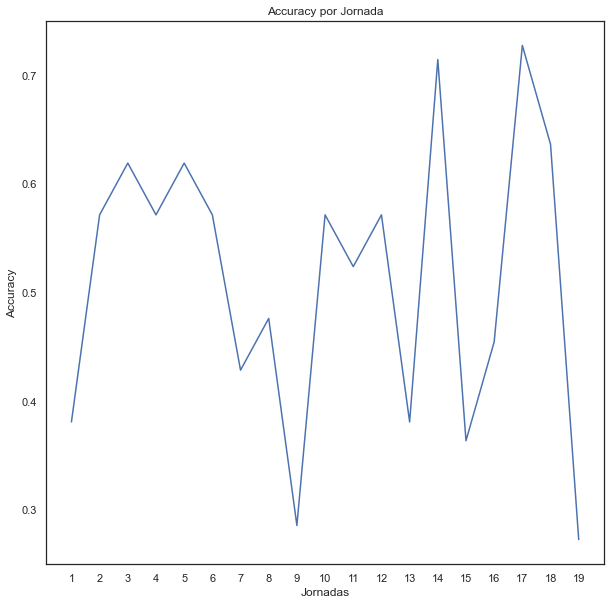

In [100]:
print('Accuracy medio:' + str(np.mean(accuracy_jornada)))
plt.figure(figsize=(10,10))
x_jornada = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19']
plt.plot(x_jornada, accuracy_jornada)
plt.title('Accuracy por Jornada')
plt.xlabel('Jornadas')
plt.ylabel('Accuracy');

Se puede observar en el gráfico que la precisión del modelo aumenta lentamente a lo largo de la temporada, aunque sea bastante irregular en ciertas jornadas(Ej: 15,16).

In [101]:
data_test.head()

,Id,Div,HomeTeam,AwayTeam,B365H,B365D,B365A,BWH,BWD,BWA,Season,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWin3,HTWin5,HTLoss3,HTLoss5,ATWin3,ATWin5,ATLoss3,ATLoss5,HTDG,ATDG,DiffPts,DiffFormPts,Journey,Med_HTDG,Med_ATDG,Med_DiffPts,Med_DiffFormPts,Med_HTP,Med_ATP,FTR_h_or_not,year,month,day
0,0,0,0,13,2.7,3.10,2.75,2.55,2.9,2.75,2223,13,9,25,13,15,18,1,1,0,1,1,1,2,2,2,0,146,0,7,4,0,0,0,0,0,0,0,0,-12,-4,-3,3,19,-0.631579,-0.210526,-0.157895,0.157895,0.789474,0.947368,0,2022,12,8
1,1,0,1,12,3.1,3.00,2.50,3.00,2.8,2.45,2223,17,21,9,16,31,30,0,0,0,2,2,1,0,2,0,1,68,1,7,7,0,0,0,0,0,0,0,0,8,5,1,0,19,0.421053,0.263158,0.052632,0.000000,1.631579,1.578947,1,2022,12,8
2,2,0,2,19,3.1,3.25,2.37,3.00,3.0,2.30,2223,14,21,23,14,15,26,1,2,2,2,1,1,1,1,1,2,185,2,3,9,0,0,1,0,0,0,0,0,-9,7,-11,-6,19,-0.473684,0.368421,-0.578947,-0.315789,0.789474,1.368421,1,2022,12,8
3,3,0,3,11,1.5,4.20,7.00,1.44,4.1,6.75,2223,20,15,13,25,31,15,0,2,2,1,0,1,2,1,1,2,101,3,8,6,0,0,0,0,0,0,0,0,7,-10,16,2,19,0.368421,-0.526316,0.842105,0.105263,1.631579,0.789474,1,2022,12,8
4,4,0,4,18,3.4,3.10,2.30,3.10,2.9,2.30,2223,16,21,23,20,18,25,0,2,2,0,2,2,1,1,1,1,148,4,7,7,0,0,0,0,0,0,0,0,-7,1,-7,0,19,-0.368421,0.052632,-0.368421,0.000000,0.947368,1.315789,1,2022,12,8


In [102]:
data_res.sort_values('Id', inplace = True)
data_res.head()

,Id,Div,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,BWH,BWD,BWA,Season,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWin3,HTWin5,HTLoss3,HTLoss5,ATWin3,ATWin5,ATLoss3,ATLoss5,HTDG,ATDG,DiffPts,DiffFormPts,Journey,Med_HTDG,Med_ATDG,Med_DiffPts,Med_DiffFormPts,Med_HTP,Med_ATP,FTR_h_or_not,year,month,day
0,0,0,0,13,2,2.7,3.10,2.75,2.55,2.9,2.75,2223,13,9,25,13,15,18,1,1,0,1,1,1,2,2,2,0,146,0,7,4,0,0,0,0,0,0,0,0,-12,-4,-3,3,19,-0.631579,-0.210526,-0.157895,0.157895,0.789474,0.947368,0,2022,12,8
1,1,0,1,12,1,3.1,3.00,2.50,3.00,2.8,2.45,2223,17,21,9,16,31,30,0,0,0,2,2,1,0,2,0,1,68,1,7,7,0,0,0,0,0,0,0,0,8,5,1,0,19,0.421053,0.263158,0.052632,0.000000,1.631579,1.578947,1,2022,12,8
2,2,0,2,19,0,3.1,3.25,2.37,3.00,3.0,2.30,2223,14,21,23,14,15,26,1,2,2,2,1,1,1,1,1,2,185,2,3,9,0,0,1,0,0,0,0,0,-9,7,-11,-6,19,-0.473684,0.368421,-0.578947,-0.315789,0.789474,1.368421,1,2022,12,8
3,3,0,3,11,0,1.5,4.20,7.00,1.44,4.1,6.75,2223,20,15,13,25,31,15,0,2,2,1,0,1,2,1,1,2,101,3,8,6,0,0,0,0,0,0,0,0,7,-10,16,2,19,0.368421,-0.526316,0.842105,0.105263,1.631579,0.789474,1,2022,12,8
4,4,0,4,18,1,3.4,3.10,2.30,3.10,2.9,2.30,2223,16,21,23,20,18,25,0,2,2,0,2,2,1,1,1,1,148,4,7,7,0,0,0,0,0,0,0,0,-7,1,-7,0,19,-0.368421,0.052632,-0.368421,0.000000,0.947368,1.315789,1,2022,12,8


In [103]:
lista_p, lista_res

([[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1],
  [0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1],
  [2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2, 2],
  [2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2],
  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2],
  [2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2],
  [2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2],
  [0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 1, 2],
  [2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2],
  [2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 0, 1, 2, 1],
  [0, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2],
  [2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2],
  [2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1],
  [0, 2, 2, 2, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1],
  [1, 2, 1, 0, 1, 1, 2, 2, 2, 2, 2],
  [1, 2, 2, 2, 2, 1, 1, 1

In [104]:
list_df = []
for x in range(1,20):
    df_temp = data_test[data_test['Journey'] == x]
    df_temp['FTR'] = lista_p[x-1]
    list_df.append(df_temp)
test_resultados = pd.concat(list_df).sort_values('Id')
test_resultados

,Id,Div,HomeTeam,AwayTeam,B365H,B365D,B365A,BWH,BWD,BWA,Season,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWin3,HTWin5,HTLoss3,HTLoss5,ATWin3,ATWin5,ATLoss3,ATLoss5,HTDG,ATDG,DiffPts,DiffFormPts,Journey,Med_HTDG,Med_ATDG,Med_DiffPts,Med_DiffFormPts,Med_HTP,Med_ATP,FTR_h_or_not,year,month,day,FTR
0,0,0,0,13,2.70,3.10,2.75,2.55,2.90,2.75,2223,13,9,25,13,15,18,1,1,0,1,1,1,2,2,2,0,146,0,7,4,0,0,0,0,0,0,0,0,-12,-4,-3,3,19,-0.631579,-0.210526,-0.157895,0.157895,0.789474,0.947368,0,2022,12,8,0
1,1,0,1,12,3.10,3.00,2.50,3.00,2.80,2.45,2223,17,21,9,16,31,30,0,0,0,2,2,1,0,2,0,1,68,1,7,7,0,0,0,0,0,0,0,0,8,5,1,0,19,0.421053,0.263158,0.052632,0.000000,1.631579,1.578947,1,2022,12,8,2
2,2,0,2,19,3.10,3.25,2.37,3.00,3.00,2.30,2223,14,21,23,14,15,26,1,2,2,2,1,1,1,1,1,2,185,2,3,9,0,0,1,0,0,0,0,0,-9,7,-11,-6,19,-0.473684,0.368421,-0.578947,-0.315789,0.789474,1.368421,1,2022,12,8,1
3,3,0,3,11,1.50,4.20,7.00,1.44,4.10,6.75,2223,20,15,13,25,31,15,0,2,2,1,0,1,2,1,1,2,101,3,8,6,0,0,0,0,0,0,0,0,7,-10,16,2,19,0.368421,-0.526316,0.842105,0.105263,1.631579,0.789474,1,2022,12,8,2
4,4,0,4,18,3.40,3.10,2.30,3.10,2.90,2.30,2223,16,21,23,20,18,25,0,2,2,0,2,2,1,1,1,1,148,4,7,7,0,0,0,0,0,0,0,0,-7,1,-7,0,19,-0.368421,0.052632,-0.368421,0.000000,0.947368,1.315789,1,2022,12,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,344,0,20,16,1.95,3.40,4.20,1.90,3.20,3.70,2223,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,141,141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,2022,8,13,2
8201,345,1,62,33,1.80,3.75,4.75,1.83,3.60,4.33,2223,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,141,141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,2022,8,13,2
207,346,0,12,5,2.05,3.20,4.00,1.98,2.95,3.80,2223,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,141,141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,2022,8,13,2
8202,347,1,42,77,3.20,3.10,2.40,3.20,3.00,2.40,2223,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,141,141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,2022,8,12,1


In [105]:
test_resultados.reset_index(drop=True, inplace = True)
data_res.reset_index(drop=True, inplace = True)

In [106]:
test_resultados.tail()

,Id,Div,HomeTeam,AwayTeam,B365H,B365D,B365A,BWH,BWD,BWA,Season,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWin3,HTWin5,HTLoss3,HTLoss5,ATWin3,ATWin5,ATLoss3,ATLoss5,HTDG,ATDG,DiffPts,DiffFormPts,Journey,Med_HTDG,Med_ATDG,Med_DiffPts,Med_DiffFormPts,Med_HTP,Med_ATP,FTR_h_or_not,year,month,day,FTR
344,344,0,20,16,1.95,3.40,4.20,1.90,3.20,3.70,2223,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,141,141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1,2022,8,13,2
345,345,1,62,33,1.80,3.75,4.75,1.83,3.60,4.33,2223,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,141,141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1,2022,8,13,2
346,346,0,12,5,2.05,3.20,4.00,1.98,2.95,3.80,2223,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,141,141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0,2022,8,13,2
347,347,1,42,77,3.20,3.10,2.40,3.20,3.00,2.40,2223,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,141,141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0,2022,8,12,1
348,348,0,3,7,1.60,3.75,6.00,1.55,3.60,5.25,2223,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,141,141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1,2022,8,12,2


In [107]:
data_res.tail()

,Id,Div,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,BWH,BWD,BWA,Season,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWin3,HTWin5,HTLoss3,HTLoss5,ATWin3,ATWin5,ATLoss3,ATLoss5,HTDG,ATDG,DiffPts,DiffFormPts,Journey,Med_HTDG,Med_ATDG,Med_DiffPts,Med_DiffFormPts,Med_HTP,Med_ATP,FTR_h_or_not,year,month,day
344,344,0,20,16,0,1.95,3.40,4.20,1.90,3.20,3.70,2223,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,141,141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1,2022,8,13
345,345,1,62,33,0,1.80,3.75,4.75,1.83,3.60,4.33,2223,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,141,141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1,2022,8,13
346,346,0,12,5,2,2.05,3.20,4.00,1.98,2.95,3.80,2223,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,141,141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0,2022,8,13
347,347,1,42,77,2,3.20,3.10,2.40,3.20,3.00,2.40,2223,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,141,141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0,2022,8,12
348,348,0,3,7,0,1.60,3.75,6.00,1.55,3.60,5.25,2223,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,141,141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1,2022,8,12


In [108]:
test_resultados.FTR[0]

0

In [109]:
res_dict

{'D': 0, 'A': 1, 'H': 2}

In [110]:
bank = 30
apu = 3
for x in range(len(test_resultados)):
    if test_resultados.FTR[x] == data_res.FTR[x]:
        if test_resultados.FTR[x] == 0:
            ben = (apu * test_resultados.B365D[x]) - apu
            bank += ben
        elif test_resultados.FTR[x] == 1:
            ben = (apu * test_resultados.B365A[x]) - apu
            bank += ben
        elif test_resultados.FTR[x] == 2:
            ben = (apu * test_resultados.B365H[x]) - apu
            bank += ben
    else:
        bank -= apu
    print(bank)
bank

27
24
21
18
21.9
26.009999999999998
23.009999999999998
27.869999999999997
24.869999999999997
21.869999999999997
18.869999999999997
24.119999999999997
25.949999999999996
28.199999999999996
25.199999999999996
22.199999999999996
27.449999999999996
29.609999999999996
26.609999999999996
31.859999999999996
35.76
32.76
38.16
43.019999999999996
40.019999999999996
44.669999999999995
41.669999999999995
44.22
47.37
51.12
54.72
56.699999999999996
53.699999999999996
50.699999999999996
47.699999999999996
44.699999999999996
47.099999999999994
50.099999999999994
57.599999999999994
54.599999999999994
51.599999999999994
54.89999999999999
51.89999999999999
55.04999999999999
55.46999999999999
52.46999999999999
55.769999999999996
61.169999999999995
65.28
73.68
77.13000000000001
78.33000000000001
81.93
83.52000000000001
80.52000000000001
77.52000000000001
74.52000000000001
71.52000000000001
68.52000000000001
65.52000000000001
62.52000000000001
59.52000000000001
56.52000000000001
53.52000000000001
59.5200000

124.92000000000002